In [19]:
# target parameters of f(x) = m*x + b
a = 3 
b = -2 
c = -3
d = 4

In [20]:
import numpy as np

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 10000)   #genero 10000 numeri casuali tra -1 e 1 (train set)
x_valid = np.random.uniform(-1, 1, 1000)    #genero 1000 numeri casuali tra -1 e 1 (validation set)
x_valid.sort()                            #ordino gli elementi
y_target = a * x_valid **3 + b * x_valid **2 +c * x_valid + d # ideal (target) function

sigma = 0.1 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(a * x_train **3 + b * x_train **2 +c * x_train + d, sigma) 
y_valid = np.random.normal(a * x_valid **3 + b * x_valid **2 +c * x_valid + d, sigma)

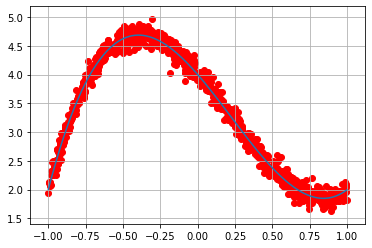

In [21]:
#plot training and target dataset
import matplotlib.pyplot as plt
plt.plot(x_valid, y_target)
plt.scatter(x_valid, y_valid, color='r')
plt.grid(True); plt.show()

In [22]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model2=tf.keras.Sequential()
model2.add(Dense(10, input_shape=(1,), activation='relu'))
model2.add(Dense(30, input_shape=(1,), activation='relu'))
model2.add(Dense(50, input_shape=(1,), activation='relu'))
model2.add(Dense(40, input_shape=(1,), activation='relu'))
model2.add(Dense(10, input_shape=(1,), activation='relu'))
model2.add(Dense(1, input_shape=(1,), ))

# compile the model choosing optimizer, loss and metrics objects
model2.compile(optimizer='Nadam', loss='mse', metrics=['mse'])
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_13 (Dense)             (None, 30)                330       
_________________________________________________________________
dense_14 (Dense)             (None, 50)                1550      
_________________________________________________________________
dense_15 (Dense)             (None, 40)                2040      
_________________________________________________________________
dense_16 (Dense)             (None, 10)                410       
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 11        
Total params: 4,361
Trainable params: 4,361
Non-trainable params: 0
____________________________________________________

In [23]:
history2 = model2.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=20,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/20
313/313 [==============================] - 1s 3ms/step - loss: 1.8016 - mse: 1.8016 - val_loss: 0.0331 - val_mse: 0.0331
Epoch 2/20
313/313 [==============================] - 1s 3ms/step - loss: 0.0161 - mse: 0.0161 - val_loss: 0.0119 - val_mse: 0.0119
Epoch 3/20
313/313 [==============================] - 1s 3ms/step - loss: 0.0120 - mse: 0.0120 - val_loss: 0.0123 - val_mse: 0.0123
Epoch 4/20
313/313 [==============================] - 1s 3ms/step - loss: 0.0121 - mse: 0.0121 - val_loss: 0.0114 - val_mse: 0.0114
Epoch 5/20
313/313 [==============================] - 1s 3ms/step - loss: 0.0123 - mse: 0.0123 - val_loss: 0.0504 - val_mse: 0.0504
Epoch 6/20
313/313 [==============================] - 1s 4ms/step - loss: 0.0121 - mse: 0.0121 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 7/20
313/313 [==============================] - 1s 4ms/step - loss: 0.0118 - mse: 0.0118 - val_loss: 0.0107 - val_mse: 0.0107
Epoch 8/20
313/313 [==============================] - 1s 3ms/step - loss: 0.

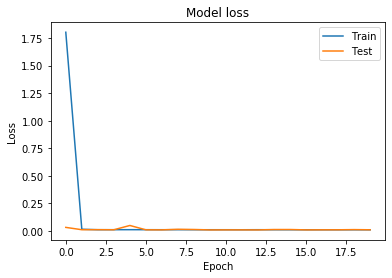

In [24]:
# look into training history
# Plot training & validation loss values
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

In [25]:
# evaluate model
score = model2.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

32/32 [==============================] - 0s 4ms/step - loss: 0.0113 - mse: 0.0113

Test loss: 0.01127716712653637
Test accuracy: 0.01127716712653637


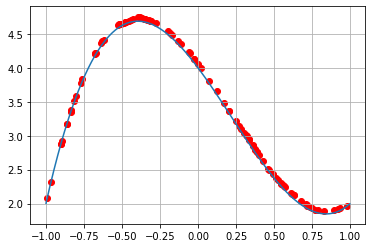

In [26]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model2.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

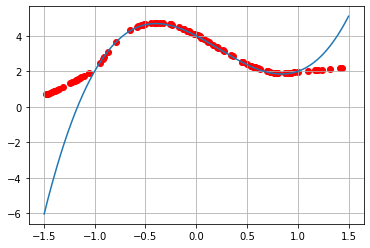

In [27]:
x_valid = np.random.uniform(-1.5, 1.5, 1000)
x_valid.sort()  
y_target = a * x_valid **3 + b * x_valid **2 +c * x_valid + d # ideal (target) function
x_predicted = np.random.uniform(-1.5, 1.5, 100)
y_predicted = model2.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

In [28]:
save_model_path='Saved/model_4_Nadam'
model2.save(filepath=save_model_path, include_optimizer=True)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: Saved/model_4_Nadam/assets


devo costruire diverse reti, addestrarle, salvarle e poi usarle per rappresentare i dati